# Loading the libraries and dataset

In [1]:
import pandas as pd

In [18]:
titanic = pd.read_csv('train.csv')

# exploring the dataset
titanic.info()
titanic.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [19]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [20]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see that there ae missing values for Age so I will fill it up with mean ages just to keep the the same without downsampling. I will also fill Cabin values ti unknown instead of NA to make a new category for the categorical variable. I am also filling in embarked to S by default I think only 2 values won't matter.

In [21]:
# filling the missing values
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Cabin'] = titanic['Cabin'].fillna('Unknown')
titanic['Embarked'] = titanic['Embarked'].fillna('S')


In [22]:
# sanity check
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Noice and clean, now I can see some visualizations to see what parameters are contributing in which way

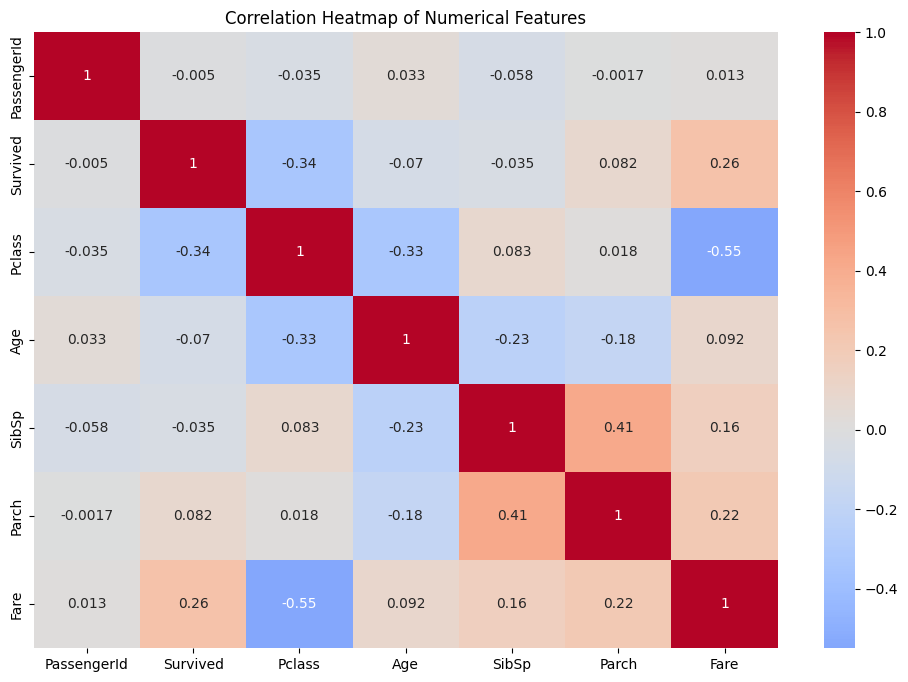

In [23]:
# visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt

# let us see the correlation between the numerical features only
numerical_features = titanic.select_dtypes(include=['number']).columns
correlation_matrix = titanic[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



In [24]:
# label encoding the categorical features
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# sanity check
titanic.head()



PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare    Cabin  Embarked  
0         A/5 21171   7.2500  Unknown         0  
1          PC 17599  71.2833      C85         1  
2  STON/O2. 3101282   7.9250  Unknown         0  
3            113803  53.1000     C123         0  
4            373450   8.0500  Unknown         0

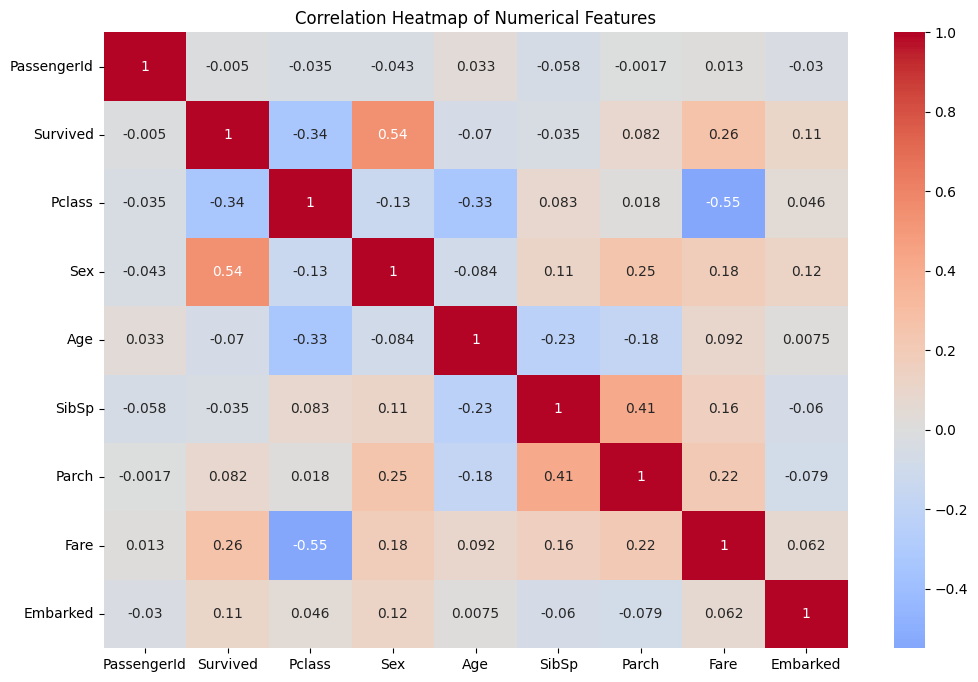

In [25]:
# creating heatmap for the numerical features after label encoding
numerical_features = titanic.select_dtypes(include=['number']).columns
correlation_matrix = titanic[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

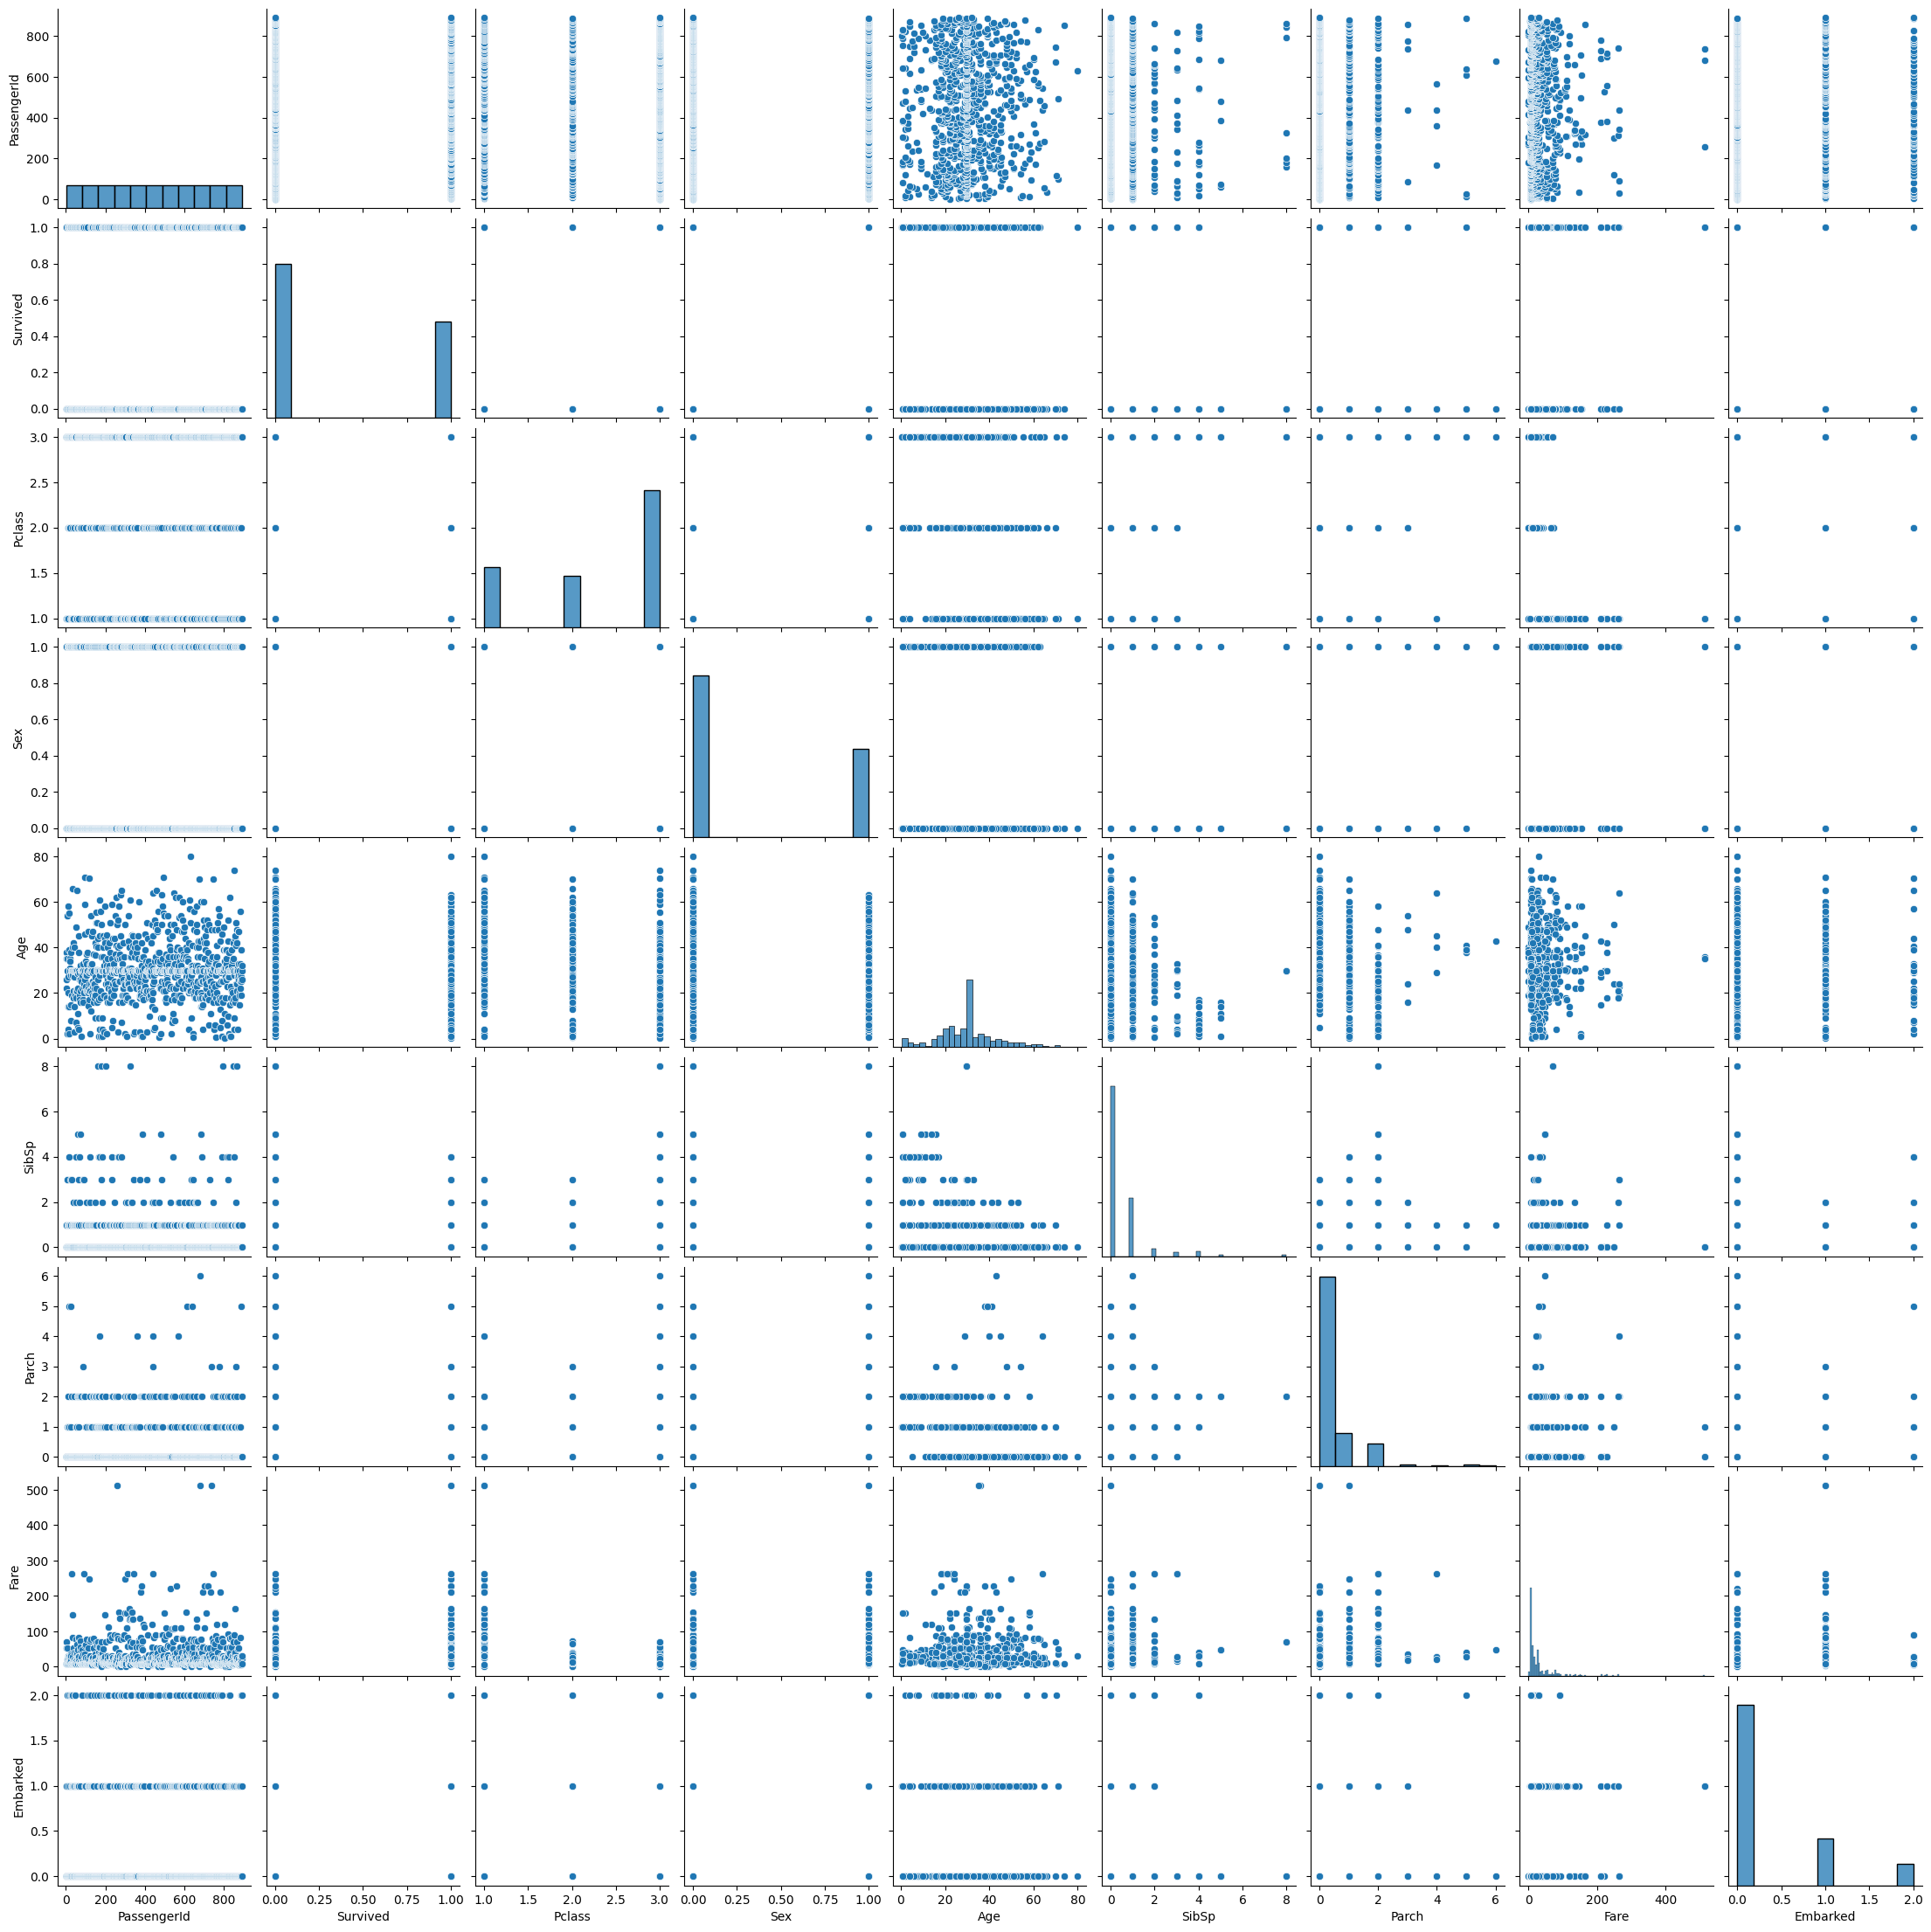

In [28]:
# pairplot between the numerical features
sns.pairplot(titanic[numerical_features])
plt.show()

No clear patter emerge from this, need to do some unsupervised learning and see if we can get something

In [35]:
# unsupervised learning -random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. Define proper feature columns (exclude PassengerId and Survived)
feature_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

# 2. Prepare features properly
X = titanic[feature_columns].copy()
y = titanic['Survived']

# 3. Handle categorical variables properly
# One-hot encode categorical variables
categorical_cols = ['Sex', 'Embarked']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 4. Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# 6. Make predictions
y_pred = rf_classifier.predict(X_val)

# 7. Evaluate the model
print("Classification Report:")
print(classification_report(y_val, y_pred))

# 8. Additional evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix
print(f"\nAccuracy: {accuracy_score(y_val, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# 9. Feature importance
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179


Accuracy: 0.8156

Confusion Matrix:
[[97 13]
 [20 49]]

Feature Importance:
      feature  importance
4        Fare    0.273715
5       Sex_1    0.268899
1         Age    0.250554
0      Pclass    0.084966
2       SibSp    0.047762
3       Parch    0.039482
6  Embarked_1    0.021371
7  Embarked_2    0.013251


In [36]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_classifier, X_encoded, y, cv=cv, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Cross-validation scores: [0.82681564 0.80337079 0.78651685 0.8258427  0.84831461]
Mean CV accuracy: 0.8182 (+/- 0.0426)


In [37]:
# importing the test dataset
test_data = pd.read_csv('test.csv')

# preprocessing the test data (EXACTLY same as training)
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Cabin'] = test_data['Cabin'].fillna('Unknown')
test_data['Embarked'] = test_data['Embarked'].fillna('S')

# Use the SAME feature columns as training
X_test = test_data[feature_columns].copy()

# Apply the SAME encoding as training
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure same columns as training data
for col in X_encoded.columns:
    if col not in X_test_encoded.columns:
        X_test_encoded[col] = 0

# Remove any extra columns
X_test_encoded = X_test_encoded[X_encoded.columns]

# making predictions on the test set
y_pred_test = rf_classifier.predict(X_test_encoded)

# creating the submission file
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_pred_test
})
submission.to_csv('submission.csv', index=False)

I will try with XGBoost and see if it works or not

In [38]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# 1. Define proper feature columns (exclude PassengerId and Survived)
# taking the best features from the previous model
feature_columns = ['Pclass', 'Age', 'Fare', 'Sex']

# 2. Prepare features properly
X = titanic[feature_columns].copy()
y = titanic['Survived']

# 3. Handle categorical variables properly
categorical_cols = ['Sex']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 4. Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Train XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

# 6. Make predictions
y_pred = xgb_model.predict(X_val)

# 7. Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_val, y_pred))
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")

# 8. Feature importance
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

Accuracy: 0.8212

Feature Importance:
  feature  importance
3   Sex_1    0.781409
0  Pclass    0.146889
1     Age    0.035976
2    Fare    0.035726


Maybe I should do some hyperparameter tuning using grid search and see if I can make any progress

In [39]:
# Grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_tuned = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Use cross-validation for more robust tuning
grid_search = GridSearchCV(
    estimator=xgb_tuned,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Use the best model
best_xgb_model = grid_search.best_estimator_
y_pred_tuned = best_xgb_model.predict(X_val)

print("\nTuned XGBoost Classification Report:")
print(classification_report(y_val, y_pred_tuned))
print(f"Tuned Accuracy: {accuracy_score(y_val, y_pred_tuned):.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}
Best cross-validation score: 0.8400

Tuned XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

Tuned Accuracy: 0.8101


Creating the submission file on this

In [40]:
# importing the test dataset
test_data = pd.read_csv('test.csv')

# preprocessing the test data (EXACTLY same as training)
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Cabin'] = test_data['Cabin'].fillna('Unknown')
test_data['Embarked'] = test_data['Embarked'].fillna('S')

# Use the SAME feature columns as training
X_test = test_data[feature_columns].copy()

# Apply the SAME encoding as training
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure same columns as training data
for col in X_encoded.columns:
    if col not in X_test_encoded.columns:
        X_test_encoded[col] = 0

# Remove any extra columns
X_test_encoded = X_test_encoded[X_encoded.columns]

# making predictions on the test set with XGBoost
y_pred_test = best_xgb_model.predict(X_test_encoded)

# creating the submission file
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_pred_test
})
submission.to_csv('submission_xgboost.csv', index=False)

# Ensemble methods

## Voting classifier

In [41]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Define base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
lr_model = LogisticRegression(random_state=42, max_iter=1000)
svc_model = SVC(probability=True, random_state=42)

# Create voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lr', lr_model),
        ('svc', svc_model)
    ],
    voting='hard'  # or 'soft' for probability-based voting
)

# Train ensemble
voting_clf.fit(X_train, y_train)

# Predictions
y_pred_ensemble = voting_clf.predict(X_val)
print("Voting Classifier Classification Report:")
print(classification_report(y_val, y_pred_ensemble))
print(f"Accuracy: {accuracy_score(y_val, y_pred_ensemble):.4f}")

Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       110
           1       0.82      0.65      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179

Accuracy: 0.8101


In [42]:
# Soft voting classifier
soft_voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lr', lr_model),
        ('svc', svc_model)
    ],
    voting='soft'
)

soft_voting_clf.fit(X_train, y_train)
y_pred_soft = soft_voting_clf.predict(X_val)
print("Soft Voting Classifier Accuracy:", accuracy_score(y_val, y_pred_soft))

Soft Voting Classifier Accuracy: 0.8324022346368715


## Stacking Classifier

In [43]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')),
    ('lr', LogisticRegression(random_state=42, max_iter=1000))
]

# Create stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)

stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_val)
print("Stacking Classifier Accuracy:", accuracy_score(y_val, y_pred_stack))

Stacking Classifier Accuracy: 0.8435754189944135


## Weighted ensemble

In [45]:
import numpy as np
# Train individual models and get their validation scores
models_and_scores = []

for model_name, model in [('RF', rf_model), ('XGB', xgb_model), ('LR', lr_model)]:
    model.fit(X_train, y_train)
    score = accuracy_score(y_val, model.predict(X_val))
    models_and_scores.append((model, score))
    print(f"{model_name} Accuracy: {score:.4f}")

# Weighted ensemble based on individual performance
weights = [score for _, score in models_and_scores]
weights = np.array(weights) / sum(weights)  # Normalize weights

# Weighted prediction
weighted_pred = np.zeros(len(y_val))
for (model, _), weight in zip(models_and_scores, weights):
    weighted_pred += weight * model.predict_proba(X_val)[:, 1]

final_weighted_pred = (weighted_pred > 0.5).astype(int)
print("Weighted Ensemble Accuracy:", accuracy_score(y_val, final_weighted_pred))

RF Accuracy: 0.8268
XGB Accuracy: 0.8045
LR Accuracy: 0.7933
Weighted Ensemble Accuracy: 0.8212290502793296


In [46]:
# Best ensemble approach combining multiple strategies
def create_ensemble_pipeline():
    # Base models
    base_models = [
        ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
        ('xgb', xgb.XGBClassifier(n_estimators=200, random_state=42, eval_metric='logloss')),
        ('lr', LogisticRegression(random_state=42, max_iter=1000))
    ]
    
    # Voting classifier
    voting_clf = VotingClassifier(estimators=base_models, voting='soft')
    
    # Stacking classifier
    stacking_clf = StackingClassifier(
        estimators=base_models,
        final_estimator=LogisticRegression(),
        cv=5
    )
    
    return voting_clf, stacking_clf

# Train and compare
voting_clf, stacking_clf = create_ensemble_pipeline()

voting_clf.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)

voting_pred = voting_clf.predict(X_val)
stacking_pred = stacking_clf.predict(X_val)

print("Voting Classifier Accuracy:", accuracy_score(y_val, voting_pred))
print("Stacking Classifier Accuracy:", accuracy_score(y_val, stacking_pred))

Voting Classifier Accuracy: 0.8268156424581006
Stacking Classifier Accuracy: 0.8491620111731844


Applying the last stacking to test dataset

In [48]:
# importing the test dataset
test_data = pd.read_csv('test.csv')

# preprocessing the test data (EXACTLY same as training)
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Cabin'] = test_data['Cabin'].fillna('Unknown')
test_data['Embarked'] = test_data['Embarked'].fillna('S')

# Handle missing Fare if any
if test_data['Fare'].isnull().any():
    test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

# Use the SAME feature columns as training
feature_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']
X_test = test_data[feature_columns].copy()

# Apply the SAME encoding as training
categorical_cols = ['Sex', 'Embarked']
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure same columns as training data
for col in X_encoded.columns:  # X_encoded should be from your training data
    if col not in X_test_encoded.columns:
        X_test_encoded[col] = 0

# Remove any extra columns
X_test_encoded = X_test_encoded[X_encoded.columns]

# making predictions on the test set with Stacking Classifier
y_pred_test = stacking_clf.predict(X_test_encoded)

# Get prediction probabilities (optional, for analysis)
y_pred_proba = stacking_clf.predict_proba(X_test_encoded)

# creating the submission file
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_pred_test
})
# Save submission
submission.to_csv('submission_stacking.csv', index=False)

### Getting into Tnsroflow descision tree - code is being copied and modified from https://www.kaggle.com/code/gusthema/titanic-competition-w-tensorflow-decision-forests

In [49]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

print(f"Found TF-DF {tfdf.__version__}")

/Users/saroshfarhan/Documents/DataScience/kaggle-titanic-predictions/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found TF-DF 1.12.0


In [50]:
train_df = pd.read_csv("train.csv")
serving_df = pd.read_csv("test.csv")

train_df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

# Prepare dataset
We will apply the following transformations on the dataset.
- Tokenize the names. For example, "Braund, Mr. Owen Harris" will become ["Braund", "Mr.", "Owen", "Harris"].
- Extract any prefix in the ticket. For example ticket "STON/O2. 3101282" will become "STON/O2." and 3101282.

In [51]:
def preprocess(df):
    df = df.copy()
    
    def normalize_name(x):
        return " ".join([v.strip(",()[].\"'") for v in x.split(" ")])
    
    def ticket_number(x):
        return x.split(" ")[-1]
        
    def ticket_item(x):
        items = x.split(" ")
        if len(items) == 1:
            return "NONE"
        return "_".join(items[0:-1])
    
    df["Name"] = df["Name"].apply(normalize_name)
    df["Ticket_number"] = df["Ticket"].apply(ticket_number)
    df["Ticket_item"] = df["Ticket"].apply(ticket_item)                     
    return df
    
preprocessed_train_df = preprocess(train_df)
preprocessed_serving_df = preprocess(serving_df)

preprocessed_train_df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                              Name     Sex   Age  SibSp  \
0                            Braund Mr Owen Harris    male  22.0      1   
1  Cumings Mrs John Bradley Florence Briggs Thayer  female  38.0      1   
2                             Heikkinen Miss Laina  female  26.0      0   
3         Futrelle Mrs Jacques Heath Lily May Peel  female  35.0      1   
4                           Allen Mr William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Ticket_number Ticket_item  
0      0         A/5 21171   7.2500   NaN        S         21171         A/5  
1      0          PC 17599  71.2833   C85        C         17599          PC  
2      0  STON/O2. 3101282   7.9250   NaN        S       3101282    STON/O2.  
3      0            113803  53.1000  C123        S        113803        NONE  
4      0            373450   8.0500   NaN        S        373450        NONE

Let's keep the list of the input features of the model. Notably, we don't want to train our model on the "PassengerId" and "Ticket" features.

In [52]:
input_features = list(preprocessed_train_df.columns)
input_features.remove("Ticket")
input_features.remove("PassengerId")
input_features.remove("Survived")
#input_features.remove("Ticket_number")

print(f"Input features: {input_features}")

Input features: ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Ticket_number', 'Ticket_item']


### Convert Pandas dataset to TensorFlow Dataset

In [53]:
def tokenize_names(features, labels=None):
    """Divite the names into tokens. TF-DF can consume text tokens natively."""
    features["Name"] =  tf.strings.split(features["Name"])
    return features, labels

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(preprocessed_train_df,label="Survived").map(tokenize_names)
serving_ds = tfdf.keras.pd_dataframe_to_tf_dataset(preprocessed_serving_df).map(tokenize_names)

## Train model with default parameters
**Train model**

First, we are training a GradientBoostedTreesModel model with the default parameters.

In [54]:
model = tfdf.keras.GradientBoostedTreesModel(
    verbose=0, # Very few logs
    features=[tfdf.keras.FeatureUsage(name=n) for n in input_features],
    exclude_non_specified_features=True, # Only use the features in "features"
    random_seed=1234,
)
model.fit(train_ds)

self_evaluation = model.make_inspector().evaluation()
print(f"Accuracy: {self_evaluation.accuracy} Loss:{self_evaluation.loss}")

W0000 00:00:1756382785.022270 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756382785.022901 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756382785.022911 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756382787.896190 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756382787.896408 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756382787.896412 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

Accuracy: 0.804347813129425 Loss:0.8922085165977478


# Train model with improved default parameters

Now you'll use some specific parameters when creating the GBT model

In [55]:
model = tfdf.keras.GradientBoostedTreesModel(
    verbose=0, # Very few logs
    features=[tfdf.keras.FeatureUsage(name=n) for n in input_features],
    exclude_non_specified_features=True, # Only use the features in "features"
    
    #num_trees=2000,
    
    # Only for GBT.
    # A bit slower, but great to understand the model.
    # compute_permutation_variable_importance=True,
    
    # Change the default hyper-parameters
    # hyperparameter_template="benchmark_rank1@v1",
    
    #num_trees=1000,
    #tuner=tuner
    
    min_examples=1,
    categorical_algorithm="RANDOM",
    #max_depth=4,
    shrinkage=0.05,
    #num_candidate_attributes_ratio=0.2,
    split_axis="SPARSE_OBLIQUE",
    sparse_oblique_normalization="MIN_MAX",
    sparse_oblique_num_projections_exponent=2.0,
    num_trees=2000,
    #validation_ratio=0.0,
    random_seed=1234,
    
)
model.fit(train_ds)

self_evaluation = model.make_inspector().evaluation()
print(f"Accuracy: {self_evaluation.accuracy} Loss:{self_evaluation.loss}")

W0000 00:00:1756382849.932613 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756382849.932664 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756382849.932685 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756382850.080880 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756382850.080891 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756382850.080895 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

Accuracy: 0.77173912525177 Loss:1.0136744976043701


I0000 00:00:1756382850.372647 3178651 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 1.01367
I0000 00:00:1756382850.372663 3178651 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 83
I0000 00:00:1756382850.374899 3178651 gradient_boosted_trees.cc:279] Truncates the model to 54 tree(s) i.e. 54  iteration(s).
I0000 00:00:1756382850.375339 3178651 gradient_boosted_trees.cc:341] Final model num-trees:54 valid-loss:1.013674 valid-accuracy:0.771739
I0000 00:00:1756382850.376264 3178651 kernel.cc:926] Export model in log directory: /var/folders/88/t4qwcm1n44z0_870pr_ryj7w0000gn/T/tmp6x8ge011 with prefix 84cfa2984916433d
I0000 00:00:1756382850.377981 3178651 kernel.cc:944] Save model in resources
I0000 00:00:1756382850.378677 3033792 abstract_model.cc:921] Model self evaluation:
Task: CLASSIFICATION
Label: __LABEL
Loss (BINOMIAL_LOG_LIKELIHOOD): 1.01367

Accuracy: 0.771739  CI95[W][0 1]
Err

Let's look at the model and you can also notice the information about variable importance that the model figured out

In [56]:
model.summary()

Model: "gradient_boosted_trees_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (11):
	Age
	Cabin
	Embarked
	Fare
	Name
	Parch
	Pclass
	Sex
	SibSp
	Ticket_item
	Ticket_number

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.           "Sex"  0.431313 ################
    2.        "Pclass"  0.401411 ##############
    3.           "Age"  0.373986 ############
    4.          "Fare"  0.361093 ###########
    5.         "SibSp"  0.292653 #######
    6.         "Parch"  0.255448 ####
    7.          "Name"  0.225272 ##
    8.   "Ticket_item"  0.182111 
    9.      "Embarked"  0.181387 
   10. "Ticket_number"  0.180897 

Variable Importance: NUM_

# Make predictions

In [59]:
def prediction_to_kaggle_format(model, threshold=0.5):
    proba_survive = model.predict(serving_ds, verbose=0)[:,0]
    return pd.DataFrame({
        "PassengerId": serving_df["PassengerId"],
        "Survived": (proba_survive >= threshold).astype(int)
    })

def make_submission(kaggle_predictions):
    path="submission_tfDT.csv"
    kaggle_predictions.to_csv(path, index=False)
    print(f"Submission exported to {path}")
    
kaggle_predictions = prediction_to_kaggle_format(model)
make_submission(kaggle_predictions)
!head submission_tfDT.csv

Submission exported to submission_tfDT.csv
PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,0
899,0
900,1


# Training a model with hyperparameter tunning

Hyper-parameter tuning is enabled by specifying the tuner constructor argument of the model. The tuner object contains all the configuration of the tuner (search space, optimizer, trial and objective).

In [60]:
tuner = tfdf.tuner.RandomSearch(num_trials=1000)
tuner.choice("min_examples", [2, 5, 7, 10])
tuner.choice("categorical_algorithm", ["CART", "RANDOM"])

local_search_space = tuner.choice("growing_strategy", ["LOCAL"])
local_search_space.choice("max_depth", [3, 4, 5, 6, 8])

global_search_space = tuner.choice("growing_strategy", ["BEST_FIRST_GLOBAL"], merge=True)
global_search_space.choice("max_num_nodes", [16, 32, 64, 128, 256])

#tuner.choice("use_hessian_gain", [True, False])
tuner.choice("shrinkage", [0.02, 0.05, 0.10, 0.15])
tuner.choice("num_candidate_attributes_ratio", [0.2, 0.5, 0.9, 1.0])


tuner.choice("split_axis", ["AXIS_ALIGNED"])
oblique_space = tuner.choice("split_axis", ["SPARSE_OBLIQUE"], merge=True)
oblique_space.choice("sparse_oblique_normalization",
                     ["NONE", "STANDARD_DEVIATION", "MIN_MAX"])
oblique_space.choice("sparse_oblique_weights", ["BINARY", "CONTINUOUS"])
oblique_space.choice("sparse_oblique_num_projections_exponent", [1.0, 1.5])

# Tune the model. Notice the `tuner=tuner`.
tuned_model = tfdf.keras.GradientBoostedTreesModel(tuner=tuner)
tuned_model.fit(train_ds, verbose=0)

tuned_self_evaluation = tuned_model.make_inspector().evaluation()
print(f"Accuracy: {tuned_self_evaluation.accuracy} Loss:{tuned_self_evaluation.loss}")

Use /var/folders/88/t4qwcm1n44z0_870pr_ryj7w0000gn/T/tmplexe0l_y as temporary training directory


W0000 00:00:1756383077.103267 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383077.103724 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383077.103793 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383077.300966 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383077.301241 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383077.301251 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false


Accuracy: 0.8904109597206116 Loss:0.6763895750045776


In the last line in the cell above, you can see the accuracy is higher than previously with default parameters and parameters set by hand.

This is the main idea behing hyperparameter tuning.

# Making an ensemble

Here you'll create 100 models with different seeds and combine their results

This approach removes a little bit the random aspects related to creating ML models

In the GBT creation is used the honest parameter. It will use different training examples to infer the structure and the leaf values. This regularization technique trades examples for bias estimates.

In [61]:
predictions = None
num_predictions = 0

for i in range(100):
    print(f"i:{i}")
    # Possible models: GradientBoostedTreesModel or RandomForestModel
    model = tfdf.keras.GradientBoostedTreesModel(
        verbose=0, # Very few logs
        features=[tfdf.keras.FeatureUsage(name=n) for n in input_features],
        exclude_non_specified_features=True, # Only use the features in "features"

        #min_examples=1,
        #categorical_algorithm="RANDOM",
        ##max_depth=4,
        #shrinkage=0.05,
        ##num_candidate_attributes_ratio=0.2,
        #split_axis="SPARSE_OBLIQUE",
        #sparse_oblique_normalization="MIN_MAX",
        #sparse_oblique_num_projections_exponent=2.0,
        #num_trees=2000,
        ##validation_ratio=0.0,
        random_seed=i,
        honest=True,
    )
    model.fit(train_ds)
    
    sub_predictions = model.predict(serving_ds, verbose=0)[:,0]
    if predictions is None:
        predictions = sub_predictions
    else:
        predictions += sub_predictions
    num_predictions += 1

predictions/=num_predictions

kaggle_predictions = pd.DataFrame({
        "PassengerId": serving_df["PassengerId"],
        "Survived": (predictions >= 0.5).astype(int)
    })

make_submission(kaggle_predictions)

i:0


W0000 00:00:1756383269.416605 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383269.416627 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383269.416629 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383269.652720 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383269.652961 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383269.652980 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:1


W0000 00:00:1756383270.142982 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383270.142992 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383270.142993 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383270.279760 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383270.279772 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383270.279781 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

W0000 00:00:1756383270.649804 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383270.649816 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383270.649817 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


i:2


I0000 00:00:1756383270.774096 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383270.774107 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383270.774112 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

W0000 00:00:1756383271.123349 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383271.123359 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383271.123361 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


i:3


I0000 00:00:1756383271.248406 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383271.248417 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383271.248421 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:4


I0000 00:00:1756383271.691195 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383271.691209 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383271.691213 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:5


W0000 00:00:1756383272.075046 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383272.075058 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383272.075060 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383272.202373 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383272.202392 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383272.202399 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:6


I0000 00:00:1756383272.609668 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383272.609681 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383272.609685 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:7


W0000 00:00:1756383272.934341 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383272.934351 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383272.934352 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383273.055159 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383273.055174 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383273.055181 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:8


I0000 00:00:1756383273.472290 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383273.472307 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383273.472349 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:9


I0000 00:00:1756383274.139047 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383274.139062 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383274.139067 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:10


W0000 00:00:1756383274.592788 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383274.592797 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383274.592799 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383274.738412 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383274.738431 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383274.738441 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:11


I0000 00:00:1756383275.192018 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383275.192032 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383275.192037 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:12


I0000 00:00:1756383275.756511 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383275.756524 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383275.756528 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:13


W0000 00:00:1756383276.094933 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383276.094948 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383276.094950 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383276.217138 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383276.217149 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383276.217153 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:14


W0000 00:00:1756383277.007457 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383277.007470 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383277.007471 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383277.134018 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383277.134030 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383277.134033 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:15


I0000 00:00:1756383277.604999 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383277.605017 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383277.605021 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:16


W0000 00:00:1756383277.897553 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383277.897563 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383277.897565 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383278.020607 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383278.020620 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383278.020624 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:17


I0000 00:00:1756383278.889185 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383278.889201 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383278.889205 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:18


W0000 00:00:1756383279.187926 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383279.187941 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383279.187942 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383279.311808 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383279.311818 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383279.311822 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:19


I0000 00:00:1756383279.821172 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383279.821190 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383279.821196 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:20


W0000 00:00:1756383280.159542 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383280.159552 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383280.159554 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383280.280667 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383280.280681 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383280.280684 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:21


I0000 00:00:1756383280.684315 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383280.684329 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383280.684332 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:22


W0000 00:00:1756383280.971330 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383280.971341 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383280.971343 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383281.090070 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383281.090079 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383281.090083 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:23


W0000 00:00:1756383281.593784 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383281.593794 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383281.593795 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383281.718663 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383281.718682 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383281.718686 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:24


I0000 00:00:1756383282.139109 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383282.139124 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383282.139128 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:25


W0000 00:00:1756383282.428981 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383282.428990 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383282.428992 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383282.550043 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383282.550056 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383282.550060 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:26


I0000 00:00:1756383282.985192 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383282.985203 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383282.985208 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:27


W0000 00:00:1756383283.275235 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383283.275249 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383283.275255 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383283.401210 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383283.401222 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383283.401226 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:28


I0000 00:00:1756383283.909779 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383283.909790 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383283.909794 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:29


W0000 00:00:1756383284.172976 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383284.172989 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383284.172991 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383284.298683 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383284.298699 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383284.298702 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:30


I0000 00:00:1756383284.709802 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383284.709814 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383284.709818 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:31


W0000 00:00:1756383285.051659 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383285.051671 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383285.051672 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383285.173835 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383285.173851 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383285.173855 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:32


W0000 00:00:1756383285.752700 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383285.752712 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383285.752714 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383285.922289 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383285.922303 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383285.922309 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:33


I0000 00:00:1756383286.340076 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383286.340091 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383286.340097 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:34


W0000 00:00:1756383286.729939 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383286.729953 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383286.729954 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383286.871113 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383286.871125 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383286.871133 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:35


I0000 00:00:1756383287.349629 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383287.349643 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383287.349646 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:36


W0000 00:00:1756383287.701392 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383287.701401 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383287.701403 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383287.835385 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383287.835398 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383287.835402 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:37


I0000 00:00:1756383288.320070 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383288.320085 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383288.320093 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:38


I0000 00:00:1756383288.926149 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383288.926160 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383288.926165 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:39


W0000 00:00:1756383289.294596 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383289.294606 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383289.294607 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383289.436748 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383289.436764 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383289.436772 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:40


I0000 00:00:1756383289.930374 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383289.930389 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383289.930393 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:41


W0000 00:00:1756383290.238312 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383290.238325 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383290.238326 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383290.414785 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383290.414799 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383290.414803 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:42


I0000 00:00:1756383290.885462 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383290.885479 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383290.885484 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:43


W0000 00:00:1756383291.188628 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383291.188641 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383291.188643 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383291.318174 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383291.318184 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383291.318188 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:44


I0000 00:00:1756383291.775279 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383291.775293 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383291.775297 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:45


W0000 00:00:1756383292.077651 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383292.077659 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383292.077661 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383292.206412 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383292.206425 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383292.206434 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:46


I0000 00:00:1756383292.591176 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383292.591192 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383292.591196 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:47


W0000 00:00:1756383292.952372 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383292.952386 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383292.952388 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383293.082431 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383293.082445 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383293.082449 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:48


W0000 00:00:1756383293.549565 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383293.549576 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383293.549577 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383293.676844 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383293.676856 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383293.676859 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:49


I0000 00:00:1756383294.091543 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383294.091555 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383294.091559 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:50


W0000 00:00:1756383294.409232 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383294.409242 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383294.409244 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383294.533789 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383294.533801 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383294.533805 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:51


I0000 00:00:1756383295.046309 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383295.046321 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383295.046325 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:52


I0000 00:00:1756383295.568035 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383295.568048 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383295.568052 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:53


W0000 00:00:1756383295.877003 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383295.877012 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383295.877014 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383296.005585 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383296.005599 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383296.005604 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:54


I0000 00:00:1756383296.890788 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383296.890802 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383296.890806 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:55


W0000 00:00:1756383297.223829 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383297.223843 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383297.223845 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383297.360775 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383297.360787 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383297.360790 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:56


I0000 00:00:1756383298.040206 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383298.040227 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383298.040232 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:57


W0000 00:00:1756383298.361909 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383298.361919 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383298.361921 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383298.505691 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383298.505707 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383298.505711 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:58


W0000 00:00:1756383298.974573 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383298.974590 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383298.974591 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383299.127963 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383299.127974 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383299.127978 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:59


I0000 00:00:1756383299.702533 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383299.702548 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383299.702553 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:60


W0000 00:00:1756383300.159181 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383300.159192 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383300.159193 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383300.341549 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383300.341564 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383300.341568 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:61


W0000 00:00:1756383300.640832 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383300.640851 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383300.640853 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383300.790473 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383300.790490 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383300.790494 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:62


I0000 00:00:1756383301.245491 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383301.245505 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383301.245508 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:63


W0000 00:00:1756383301.577400 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383301.577412 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383301.577414 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383301.709422 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383301.709433 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383301.709437 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:64


I0000 00:00:1756383302.167020 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383302.167033 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383302.167037 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:65


W0000 00:00:1756383302.481744 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383302.481754 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383302.481756 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383302.609802 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383302.609814 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383302.609817 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:66


I0000 00:00:1756383303.093651 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383303.093662 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383303.093666 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:67


W0000 00:00:1756383303.372735 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383303.372746 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383303.372748 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383303.498816 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383303.498827 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383303.498831 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:68


W0000 00:00:1756383304.320751 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383304.320767 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383304.320769 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383304.528607 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383304.528618 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383304.528622 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:69


I0000 00:00:1756383305.083411 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383305.083424 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383305.083433 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:70


W0000 00:00:1756383305.676402 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383305.676411 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383305.676413 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383305.833797 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383305.833808 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383305.833812 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:71


I0000 00:00:1756383306.310140 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383306.310156 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383306.310160 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:72


W0000 00:00:1756383306.621435 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383306.621451 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383306.621453 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383306.760237 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383306.760249 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383306.760253 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:73


I0000 00:00:1756383307.223891 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383307.223903 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383307.223907 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:74


W0000 00:00:1756383307.487860 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383307.487873 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383307.487875 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383307.616948 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383307.616963 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383307.616967 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:75


W0000 00:00:1756383308.170097 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383308.170108 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383308.170110 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383308.305203 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383308.305221 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383308.305225 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:76


I0000 00:00:1756383308.716272 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383308.716283 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383308.716287 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:77


W0000 00:00:1756383308.994866 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383308.994874 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383308.994876 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383309.129852 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383309.129867 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383309.129872 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:78


I0000 00:00:1756383309.570003 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383309.570015 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383309.570020 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:79


W0000 00:00:1756383309.837105 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383309.837117 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383309.837119 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383309.962938 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383309.962952 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383309.962955 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:80


I0000 00:00:1756383310.429684 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383310.429696 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383310.429699 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:81


W0000 00:00:1756383310.734447 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383310.734459 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383310.734460 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383310.870632 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383310.870648 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383310.870656 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:82


I0000 00:00:1756383311.433528 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383311.433543 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383311.433546 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:83


W0000 00:00:1756383311.774962 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383311.774972 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383311.774973 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383311.900235 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383311.900249 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383311.900253 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:84


I0000 00:00:1756383312.367789 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383312.367804 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383312.367808 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:85


I0000 00:00:1756383312.888518 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383312.888533 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383312.888537 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:86


W0000 00:00:1756383313.220164 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383313.220181 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383313.220183 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383313.346240 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383313.346258 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383313.346263 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:87


I0000 00:00:1756383313.882387 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383313.882398 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383313.882401 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:88


W0000 00:00:1756383314.263148 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383314.263158 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383314.263159 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383314.389282 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383314.389295 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383314.389300 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:89


I0000 00:00:1756383314.780551 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383314.780563 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383314.780567 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:90


W0000 00:00:1756383315.093933 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383315.093943 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383315.093945 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383315.221575 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383315.221592 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383315.221598 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:91


I0000 00:00:1756383315.648527 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383315.648539 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383315.648543 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:92


W0000 00:00:1756383316.005068 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383316.005080 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383316.005082 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383316.133861 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383316.133881 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383316.133886 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:93


I0000 00:00:1756383316.731095 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383316.731115 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383316.731119 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:94


W0000 00:00:1756383317.123899 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383317.123911 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383317.123913 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383317.252995 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383317.253011 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383317.253016 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:95


I0000 00:00:1756383317.671033 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383317.671046 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383317.671051 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:96


W0000 00:00:1756383318.499972 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383318.499985 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383318.499986 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383318.638375 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383318.638390 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383318.638393 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:97


I0000 00:00:1756383319.109271 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383319.109286 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383319.109290 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guides {
  column_name_pattern: "^SibSp$"
}
column_guides {
  column_name_pattern: "^Parch$"
}
column_guides {
  column_name_pattern: "^Fare$"
}
column_guides {
  column_name_pattern: "^Cabin$"
}
column_guides {
  column_name_pattern: "^Embarked$"
}
column_guides {
  column_name_pattern: "^Ticket_number$"
}
column_guides {
  column_name_pattern: "^Ticket_item$"
}
default_column_guide {
  categorial {
    max_vocab_

i:98


W0000 00:00:1756383319.405191 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383319.405209 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383319.405211 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383319.544779 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383319.544790 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383319.544794 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

i:99


W0000 00:00:1756383320.034617 3033792 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383320.034631 3033792 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1756383320.034633 3033792 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1756383320.165914 3033792 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756383320.165927 3033792 kernel.cc:783] Collect training examples
I0000 00:00:1756383320.165931 3033792 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
column_guides {
  column_name_pattern: "^Pclass$"
}
column_guides {
  column_name_pattern: "^Name$"
}
column_guides {
  column_name_pattern: "^Sex$"
}
column_guides {
  column_name_pattern: "^Age$"
}
column_guide

Submission exported to submission_tfDT.csv
